In [185]:
import env
import acquire
import prepare
import explore

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics as met

from pydataset import data
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.



In [186]:
df = acquire.get_titanic_data()
df.head()

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [187]:

df = prepare.prep_titanic(df)
df.head()

,survived,pclass,fare,alone,family,sex_male,embark_town_Queenstown,embark_town_Southampton
passenger_id,,,,,,,,
0,0,3,7.2500,0,1,1,0,1
1,1,1,71.2833,0,1,0,0,0
2,1,3,7.9250,1,0,0,0,1
3,1,1,53.1000,0,1,0,0,1
4,0,3,8.0500,1,0,1,0,1


In [188]:
train, validate, test = prepare.data_split(df, 'survived')

In [189]:
train.shape

(534, 8)

In [190]:
X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [191]:
X_train.shape, y_train.shape

((534, 7), (534,))

In [192]:
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)



In [193]:
clf = clf.fit(X_train, y_train)

[Text(0.5, 0.875, 'sex_male <= 0.5\ngini = 0.473\nsamples = 534\nvalue = [329, 205]\nclass = 0'),
 Text(0.25, 0.625, 'pclass <= 2.5\ngini = 0.372\nsamples = 186\nvalue = [46, 140]\nclass = 1'),
 Text(0.125, 0.375, 'fare <= 28.856\ngini = 0.078\nsamples = 98\nvalue = [4, 94]\nclass = 1'),
 Text(0.0625, 0.125, 'gini = 0.133\nsamples = 42\nvalue = [3, 39]\nclass = 1'),
 Text(0.1875, 0.125, 'gini = 0.035\nsamples = 56\nvalue = [1, 55]\nclass = 1'),
 Text(0.375, 0.375, 'family <= 3.5\ngini = 0.499\nsamples = 88\nvalue = [42, 46]\nclass = 1'),
 Text(0.3125, 0.125, 'gini = 0.475\nsamples = 72\nvalue = [28, 44]\nclass = 1'),
 Text(0.4375, 0.125, 'gini = 0.219\nsamples = 16\nvalue = [14, 2]\nclass = 0'),
 Text(0.75, 0.625, 'fare <= 18.275\ngini = 0.304\nsamples = 348\nvalue = [283, 65]\nclass = 0'),
 Text(0.625, 0.375, 'alone <= 0.5\ngini = 0.193\nsamples = 222\nvalue = [198, 24]\nclass = 0'),
 Text(0.5625, 0.125, 'gini = 0.351\nsamples = 22\nvalue = [17, 5]\nclass = 0'),
 Text(0.6875, 0.125, '

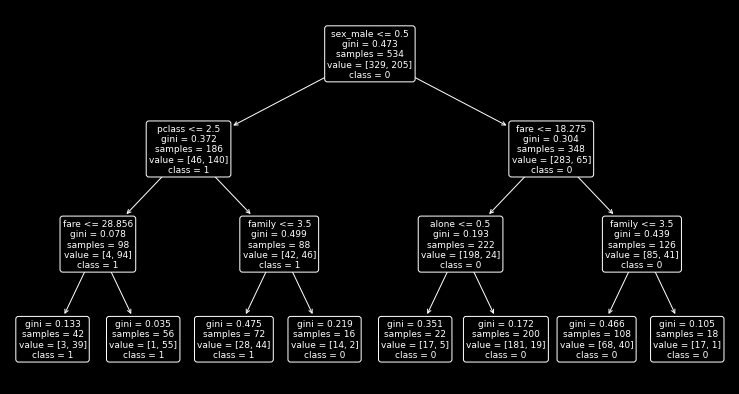

In [194]:
plt.figure(figsize=(13, 7))
plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_.astype(str), rounded=True)

In [195]:
y_pred = clf.predict(X_train)
y_pred[0:5]

array([0, 1, 0, 0, 0])

In [196]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.905     , 0.095     ],
       [0.01785714, 0.98214286],
       [0.62962963, 0.37037037],
       [0.62962963, 0.37037037],
       [0.905     , 0.095     ]])

In [197]:
pd.crosstab(y_train,y_pred)

col_0,0,1
survived,,
0,297,32
1,67,138


3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.



In [198]:
clf.score(X_train, y_train)

0.8146067415730337

In [199]:
y_train.value_counts()

0    329
1    205
Name: survived, dtype: int64

In [200]:
confusion_matrix(y_train, y_pred)

array([[297,  32],
       [ 67, 138]])

In [201]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       329
           1       0.81      0.67      0.74       205

    accuracy                           0.81       534
   macro avg       0.81      0.79      0.80       534
weighted avg       0.81      0.81      0.81       534



4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



In [202]:
print('Accuracy of Decision Tree Classifier on Training Set: {:.2f}' .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree Classifier on Training Set: 0.81


In [203]:
labels = sorted(y_train.unique())
pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,0,1
0,297,32
1,67,138


In [204]:
print("Classification Report")
print(classification_report(y_train, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       329
           1       0.81      0.67      0.74       205

    accuracy                           0.81       534
   macro avg       0.81      0.79      0.80       534
weighted avg       0.81      0.81      0.81       534



5. Run through steps 2-4 using a different max_depth value.



In [205]:
# max_depth 5 instead of 3
clf = DecisionTreeClassifier(max_depth=5, random_state=123)

In [206]:
clf = clf.fit(X_train, y_train)

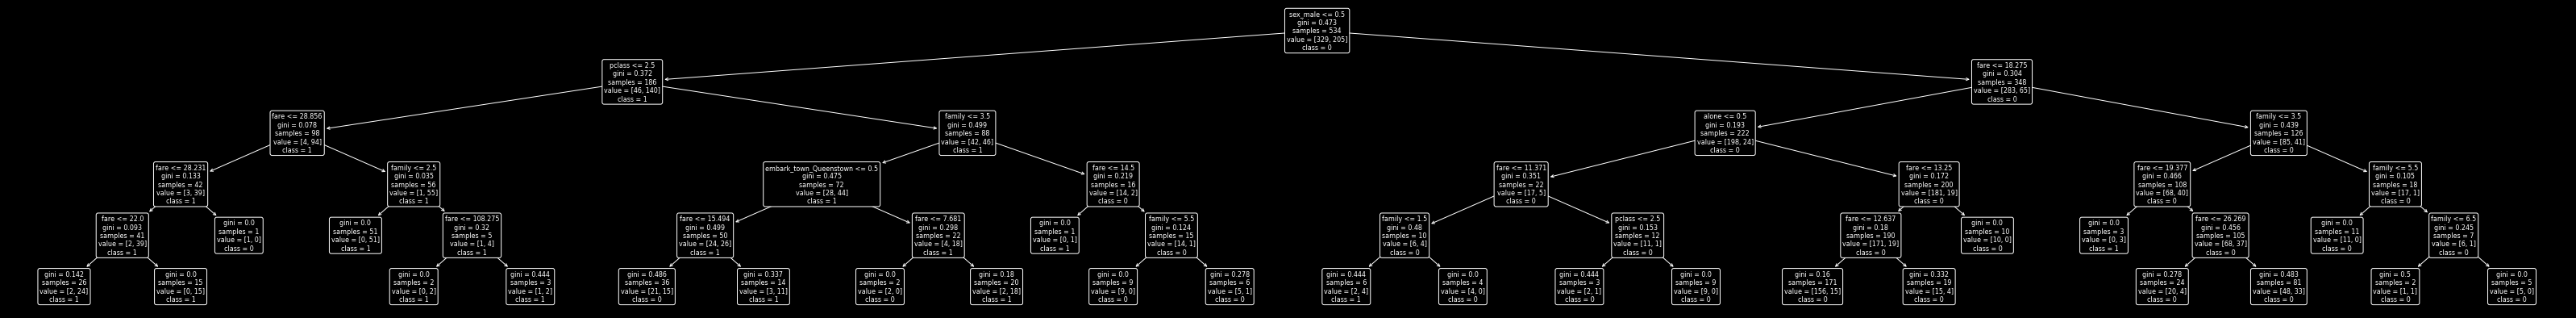

In [207]:
plt.figure(figsize=(57, 7))
plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_.astype(str), rounded=True)
plt.show()

In [208]:
clf.score(X_train, y_train)

0.8426966292134831

6. Which model performs better on your in-sample data?



In [209]:
# While the 5 tier can iek out 3% more accuracy, I'm inclined to believe a 3 tier is superior.

7. Which model performs best on your out-of-sample data, the validate set?



In [210]:
clf.score(X_validate, y_validate)

0.7808988764044944

In [211]:
# max_depth 3
clf = DecisionTreeClassifier(max_depth=3, random_state=123)
clf = clf.fit(X_train, y_train)
clf.score(X_validate, y_validate)

0.8033707865168539

In [212]:
# 3 tier proves 2% superior on validate, so 5 tier was starting to overfit our train data.

Work through these same exercises using the Telco dataset.

Experiment with this model on other datasets with a higher number of output classes.

In [213]:
telco = acquire.get_telco_data()
telco = prepare.prep_telco(telco)


In [214]:
telco = telco[telco.total_charges != ' ']
telco['total_charges'] = telco.total_charges.astype(float)

In [215]:
train, validate, test = prepare.data_split(telco, 'churn_encoded')
X_train = train.drop(columns=['churn_encoded'])
y_train = train.churn_encoded

X_validate = validate.drop(columns=['churn_encoded'])
y_validate = validate.churn_encoded

X_test = test.drop(columns=['churn_encoded'])
y_test = test.churn_encoded

In [216]:
clf = DecisionTreeClassifier(max_depth=3, random_state=123)
clf = clf.fit(X_train, y_train)

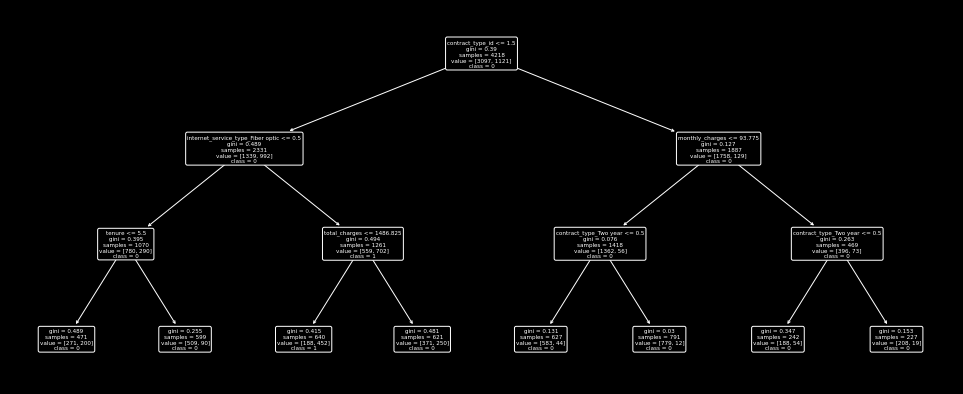

In [217]:
plt.figure(figsize=(17, 7))
plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_.astype(str), rounded=True)
plt.show()

In [218]:
y_pred = clf.predict(X_train)
y_pred[0:5]

array([0, 0, 0, 0, 0])

In [219]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.98482933, 0.01517067],
       [0.84974958, 0.15025042],
       [0.84974958, 0.15025042],
       [0.84974958, 0.15025042],
       [0.84974958, 0.15025042]])

In [220]:
pd.crosstab(y_train,y_pred)

col_0,0,1
churn_encoded,,
0,2909,188
1,669,452


In [221]:
clf.score(X_train, y_train)

0.7968231389284021

In [222]:
y_train.value_counts()

0    3097
1    1121
Name: churn_encoded, dtype: int64

In [223]:
confusion_matrix(y_train, y_pred)

array([[2909,  188],
       [ 669,  452]])

In [224]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      3097
           1       0.71      0.40      0.51      1121

    accuracy                           0.80      4218
   macro avg       0.76      0.67      0.69      4218
weighted avg       0.78      0.80      0.78      4218



In [225]:
print('Accuracy of Decision Tree Classifier on Training Set: {:.2f}' .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree Classifier on Training Set: 0.80


In [226]:
labels = sorted(y_train.unique())
pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,0,1
0,2909,188
1,669,452


In [227]:
print("Classification Report")
print(classification_report(y_train, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      3097
           1       0.71      0.40      0.51      1121

    accuracy                           0.80      4218
   macro avg       0.76      0.67      0.69      4218
weighted avg       0.78      0.80      0.78      4218



In [228]:
# max_depth 4 this time instead of 3
clf = DecisionTreeClassifier(max_depth=4, random_state=123)
clf = clf.fit(X_train, y_train)

In [229]:
print('Accuracy of Decision Tree Classifier on Training Set: {:.2f}' .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree Classifier on Training Set: 0.80


In [230]:
clf.score(X_validate, y_validate)

0.7704335465529495

In [231]:
# max_depth 3
clf = DecisionTreeClassifier(max_depth=3, random_state=123)
clf = clf.fit(X_train, y_train)
clf.score(X_validate, y_validate)

0.7718550106609808

In [232]:
# 3 seems superior for this set as well.

### Random Forest

Continue working in your model file with titanic data to do the following:

1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.



In [233]:
train, validate, test = prepare.data_split(df, 'survived')
X_train = X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [234]:
rf = RandomForestClassifier(min_samples_leaf=1,max_depth=3,random_state=123)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=123)

In [235]:
X_train.head(1)

,pclass,fare,alone,family,sex_male,embark_town_Queenstown,embark_town_Southampton
passenger_id,,,,,,,
455,3,7.8958,1,0,1,0,0


In [236]:
print(rf.feature_importances_)

[0.17015407 0.21431702 0.04640156 0.07207908 0.42558184 0.02586645
 0.04559998]


In [237]:
y_pred = rf.predict(X_train)
y_pred_proba = rf.predict_proba(X_train)

2. Evaluate your results using the model score, confusion matrix, and classification report.



In [238]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.82


In [239]:
confusion_matrix(y_train,y_pred)

array([[307,  22],
       [ 75, 130]])

In [240]:
pd.crosstab(y_train, y_pred)

col_0,0,1
survived,,
0,307,22
1,75,130


In [241]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       329
           1       0.86      0.63      0.73       205

    accuracy                           0.82       534
   macro avg       0.83      0.78      0.80       534
weighted avg       0.82      0.82      0.81       534



In [242]:
# Misty's Suggestion for a pretty classification report!
report = classification_report(y_train, y_pred, output_dict=True)
pd.DataFrame(report)

,0,1,accuracy,macro avg,weighted avg
precision,0.803665,0.855263,0.818352,0.829464,0.823473
recall,0.933131,0.634146,0.818352,0.783639,0.818352
f1-score,0.863572,0.728291,0.818352,0.795932,0.811639
support,329.000000,205.000000,0.818352,534.000000,534.000000


3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



In [243]:
pd.crosstab(y_train, y_pred)

col_0,0,1
survived,,
0,307,22
1,75,130


In [244]:
TP = 130
TN = 370
FP = 22
FN = 75

In [245]:
print(f'accuracy: {met.accuracy_score(train.survived, rf.predict(X_train)):.2%}')
print(f'true positive rate / recall: {met.recall_score(train.survived, rf.predict(X_train)):.2%}')
print(f'true negative rate / Specificity: {(TN)/(FP+TN):.2%}')
print(f'false potivie rate / Percision: {met.precision_score(train.survived, rf.predict(X_train)):.2%}')
print(f'false negative rate: {(TN)/(TN+FN):.2%}')
print(f'f1-score: {met.f1_score(train.survived, rf.predict(X_train)):.2%}')
print(f'support: {rf.predict(X_train).sum()}')

accuracy: 81.84%
true positive rate / recall: 63.41%
true negative rate / Specificity: 94.39%
false potivie rate / Percision: 85.53%
false negative rate: 83.15%
f1-score: 72.83%
support: 152


4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.



In [246]:
rf2 = RandomForestClassifier(min_samples_leaf=2,max_depth=2,random_state=123)
rf2.fit(X_train, y_train)
rf3 = RandomForestClassifier(min_samples_leaf=3,max_depth=1,random_state=123)
rf3.fit(X_train, y_train)

RandomForestClassifier(max_depth=1, min_samples_leaf=3, random_state=123)

##### Random Forest #2 (leaf: 2, depth: 2)

In [247]:
print(rf2.feature_importances_)

[0.19648319 0.21517533 0.06850819 0.07002943 0.39208748 0.01058468
 0.0471317 ]


In [248]:
y_pred2 = rf2.predict(X_train)
y_pred_proba2 = rf2.predict_proba(X_train)

In [249]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf2.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.80


In [250]:
report = classification_report(y_train, y_pred2, output_dict=True)
pd.DataFrame(report)

,0,1,accuracy,macro avg,weighted avg
precision,0.781726,0.850000,0.799625,0.815863,0.807936
recall,0.936170,0.580488,0.799625,0.758329,0.799625
f1-score,0.852006,0.689855,0.799625,0.770930,0.789757
support,329.000000,205.000000,0.799625,534.000000,534.000000


In [251]:
pd.crosstab(y_train, y_pred2)

col_0,0,1
survived,,
0,308,21
1,86,119


In [252]:
TP2 = 119
TN2 = 308
FP2 = 21
FN2 = 86

print(f'accuracy: {met.accuracy_score(train.survived, rf2.predict(X_train)):.2%}')
print(f'true positive rate / recall: {met.recall_score(train.survived, rf2.predict(X_train)):.2%}')
print(f'true negative rate / Specificity: {(TN2)/(FP2+TN2):.2%}')
print(f'false potivie rate / Percision: {met.precision_score(train.survived, rf2.predict(X_train)):.2%}')
print(f'false negative rate: {(TN2)/(TN2+FN2):.2%}')
print(f'f1-score: {met.f1_score(train.survived, rf2.predict(X_train)):.2%}')
print(f'support: {rf2.predict(X_train).sum()}')

accuracy: 79.96%
true positive rate / recall: 58.05%
true negative rate / Specificity: 93.62%
false potivie rate / Percision: 85.00%
false negative rate: 78.17%
f1-score: 68.99%
support: 140


##### Random Forest 3 (leaf: 3, Depth: 1)

5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?



In [253]:
print(rf3.feature_importances_)

[0.25 0.25 0.13 0.13 0.19 0.   0.05]


In [254]:
y_pred3 = rf3.predict(X_train)
y_pred_proba3 = rf3.predict_proba(X_train)

In [255]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf3.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.75


In [256]:
report = classification_report(y_train, y_pred3, output_dict=True)
pd.DataFrame(report)

,0,1,accuracy,macro avg,weighted avg
precision,0.713348,0.961039,0.749064,0.837193,0.808435
recall,0.990881,0.360976,0.749064,0.675929,0.749064
f1-score,0.829517,0.524823,0.749064,0.677170,0.712546
support,329.000000,205.000000,0.749064,534.000000,534.000000


In [257]:
pd.crosstab(y_train, y_pred3)

col_0,0,1
survived,,
0,326,3
1,131,74


In [258]:
TP3 = 74
TN3 = 326
FP3 = 3
FN3 = 131

print(f'accuracy: {met.accuracy_score(train.survived, rf3.predict(X_train)):.2%}')
print(f'true positive rate / recall: {met.recall_score(train.survived, rf3.predict(X_train)):.2%}')
print(f'true negative rate / Specificity: {(TN3)/(FP3+TN3):.2%}')
print(f'false potivie rate / Percision: {met.precision_score(train.survived, rf3.predict(X_train)):.2%}')
print(f'false negative rate: {(TN3)/(TN3+FN3):.2%}')
print(f'f1-score: {met.f1_score(train.survived, rf3.predict(X_train)):.2%}')
print(f'support: {rf3.predict(X_train).sum()}')

accuracy: 74.91%
true positive rate / recall: 36.10%
true negative rate / Specificity: 99.09%
false potivie rate / Percision: 96.10%
false negative rate: 71.33%
f1-score: 52.48%
support: 77


After making a few models, which one has the best performance (or closest metrics) on both train and validate?

In [259]:
print(f"Random Forest 1: {rf.score(X_train, y_train), rf.score(X_validate, y_validate)}")
print(f"Random Forest 2: {rf2.score(X_train, y_train), rf2.score(X_validate, y_validate)}")
print(f"Random Forest 3: {rf3.score(X_train, y_train), rf3.score(X_validate, y_validate)}")

Random Forest 1: (0.8183520599250936, 0.8033707865168539)
Random Forest 2: (0.799625468164794, 0.7865168539325843)
Random Forest 3: (0.7490636704119851, 0.7584269662921348)


In [260]:
rf.score(X_train, y_train) - rf.score(X_validate, y_validate), rf2.score(X_train, y_train) - rf2.score(X_validate, y_validate), rf3.score(X_validate, y_validate) - rf3.score(X_train, y_train)

(0.014981273408239737, 0.013108614232209659, 0.009363295880149725)

Random Forest 3 (3 leaf, 1 depth), has the closest metrics on both train and validate with an ~0.0094 difference. About 0.004-0.005 less than the other two trees. Which is interesting because it has the least amount of False Positives, But a higher amount of False Negatives.

In [261]:
# You CAN change hyperparameters and values that the model runs on.

#### Base Line Accuracy, Get!

In [262]:
baseline = y_train.mode()
matches_baseline_pred = y_train == 0

baseline_accuracy = matches_baseline_pred.mean()
print(baseline_accuracy)

0.6161048689138576


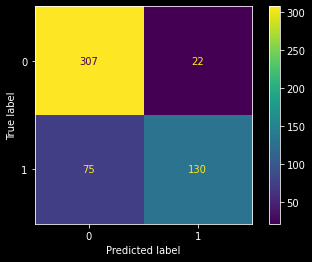

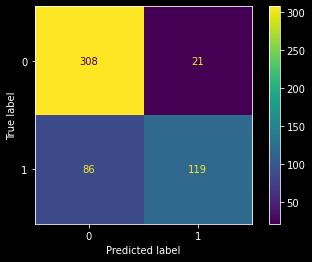

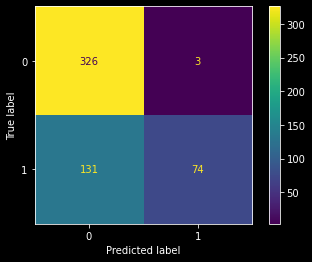

In [263]:
cm = confusion_matrix(y_train,y_pred)
disp = met.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
cm2 = confusion_matrix(y_train,y_pred2)
disp2 = met.ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=rf2.classes_)
cm3 = confusion_matrix(y_train,y_pred3)
disp3 = met.ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=rf3.classes_)

disp.plot()
disp2.plot()
disp3.plot()
plt.show()

### KNN:

Continue working in your model file with the titanic dataset.

1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)



In [264]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn2 = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(X_train, y_train)
knn2.fit(X_train, y_train)

KNeighborsClassifier()

In [265]:
y_pred_k = knn.predict(X_train)
y_pred_k2 = knn2.predict(X_train)
y_pred_proba_k = knn.predict_proba(X_train)
y_pred_proba_k2 = knn2.predict_proba(X_train)

2. Evaluate your results using the model score, confusion matrix, and classification report.



In [266]:
print('Accuracy of KNN classifier on traing set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of KNN classifier on traing set: {:.2f}'.format(knn2.score(X_train, y_train)))

Accuracy of KNN classifier on traing set: 0.94
Accuracy of KNN classifier on traing set: 0.81


In [267]:
pd.crosstab(y_train, y_pred_k)

col_0,0,1
survived,,
0,322,7
1,26,179


In [268]:
pd.crosstab(y_train, y_pred_k2)

col_0,0,1
survived,,
0,283,46
1,53,152


In [269]:
print(classification_report(y_train, y_pred_k))
print(classification_report(y_train, y_pred_k2))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       329
           1       0.96      0.87      0.92       205

    accuracy                           0.94       534
   macro avg       0.94      0.93      0.93       534
weighted avg       0.94      0.94      0.94       534

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       329
           1       0.77      0.74      0.75       205

    accuracy                           0.81       534
   macro avg       0.80      0.80      0.80       534
weighted avg       0.81      0.81      0.81       534



3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



In [270]:
TP_K = 179
TN_K = 322
FP_K = 7
FN_K = 26

print(f'accuracy: {met.accuracy_score(train.survived, knn.predict(X_train)):.2%}')
print(f'true positive rate / recall: {met.recall_score(train.survived, knn.predict(X_train)):.2%}')
print(f'true negative rate / Specificity: {(TN_K)/(FP_K+TN_K):.2%}')
print(f'false potivie rate / Percision: {met.precision_score(train.survived, knn.predict(X_train)):.2%}')
print(f'false negative rate: {(TN_K)/(TN_K+FN_K):.2%}')
print(f'f1-score: {met.f1_score(train.survived, knn.predict(X_train)):.2%}')
print(f'support: {knn.predict(X_train).sum()}')

accuracy: 93.82%
true positive rate / recall: 87.32%
true negative rate / Specificity: 97.87%
false potivie rate / Percision: 96.24%
false negative rate: 92.53%
f1-score: 91.56%
support: 186


In [271]:
TP_K2 = 152
TN_K2 = 283
FP_K2 = 46
FN_K2 = 53

print(f'accuracy: {met.accuracy_score(train.survived, knn2.predict(X_train)):.2%}')
print(f'true positive rate / recall: {met.recall_score(train.survived, knn2.predict(X_train)):.2%}')
print(f'true negative rate / Specificity: {(TN_K2)/(FP_K2+TN_K2):.2%}')
print(f'false potivie rate / Percision: {met.precision_score(train.survived, knn2.predict(X_train)):.2%}')
print(f'false negative rate: {(TN_K2)/(TN_K2+FN_K2):.2%}')
print(f'f1-score: {met.f1_score(train.survived, knn2.predict(X_train)):.2%}')
print(f'support: {knn2.predict(X_train).sum()}')

accuracy: 81.46%
true positive rate / recall: 74.15%
true negative rate / Specificity: 86.02%
false potivie rate / Percision: 76.77%
false negative rate: 84.23%
f1-score: 75.43%
support: 198


4. Run through steps 2-4 setting k to 10



In [272]:
knn3 = KNeighborsClassifier(n_neighbors=10, weights='distance')
knn4 = KNeighborsClassifier(n_neighbors=10, weights='uniform')
knn3.fit(X_train, y_train)
knn4.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [273]:
y_pred_k3 = knn3.predict(X_train)
y_pred_k4 = knn4.predict(X_train)
y_pred_proba_k3 = knn3.predict_proba(X_train)
y_pred_proba_k4 = knn4.predict_proba(X_train)

In [274]:
print('Accuracy of KNN classifier on traing set: {:.2f}'.format(knn3.score(X_train, y_train)))
print('Accuracy of KNN classifier on traing set: {:.2f}'.format(knn4.score(X_train, y_train)))

Accuracy of KNN classifier on traing set: 0.94
Accuracy of KNN classifier on traing set: 0.77


In [275]:
print(classification_report(y_train, y_pred_k3))
print(classification_report(y_train, y_pred_k4))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       329
           1       0.99      0.85      0.92       205

    accuracy                           0.94       534
   macro avg       0.95      0.92      0.93       534
weighted avg       0.94      0.94      0.94       534

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       329
           1       0.74      0.63      0.68       205

    accuracy                           0.77       534
   macro avg       0.77      0.75      0.75       534
weighted avg       0.77      0.77      0.77       534



In [276]:
pd.crosstab(y_train, y_pred_k3)

col_0,0,1
survived,,
0,327,2
1,30,175


In [277]:
pd.crosstab(y_train, y_pred_k4)

col_0,0,1
survived,,
0,284,45
1,76,129


In [278]:
TP_K3 = 175
TN_K3 = 327
FP_K3 = 2
FN_K3 = 30

print(f'accuracy: {met.accuracy_score(train.survived, knn3.predict(X_train)):.2%}')
print(f'true positive rate / recall: {met.recall_score(train.survived, knn3.predict(X_train)):.2%}')
print(f'true negative rate / Specificity: {(TN_K3)/(FP_K3+TN_K3):.2%}')
print(f'false potivie rate / Percision: {met.precision_score(train.survived, knn3.predict(X_train)):.2%}')
print(f'false negative rate: {(TN_K)/(TN_K+FN_K):.2%}')
print(f'f1-score: {met.f1_score(train.survived, knn3.predict(X_train)):.2%}')
print(f'support: {knn3.predict(X_train).sum()}')

accuracy: 94.01%
true positive rate / recall: 85.37%
true negative rate / Specificity: 99.39%
false potivie rate / Percision: 98.87%
false negative rate: 92.53%
f1-score: 91.62%
support: 177


In [279]:
TP_K4 = 129
TN_K4 = 284
FP_K4 = 45
FN_K4 = 76

print(f'accuracy: {met.accuracy_score(train.survived, knn4.predict(X_train)):.2%}')
print(f'true positive rate / recall: {met.recall_score(train.survived, knn4.predict(X_train)):.2%}')
print(f'true negative rate / Specificity: {(TN_K4)/(FP_K4+TN_K4):.2%}')
print(f'false potivie rate / Percision: {met.precision_score(train.survived, knn4.predict(X_train)):.2%}')
print(f'false negative rate: {(TN_K4)/(TN_K4+FN_K4):.2%}')
print(f'f1-score: {met.f1_score(train.survived, knn4.predict(X_train)):.2%}')
print(f'support: {knn4.predict(X_train).sum()}')

accuracy: 77.34%
true positive rate / recall: 62.93%
true negative rate / Specificity: 86.32%
false potivie rate / Percision: 74.14%
false negative rate: 78.89%
f1-score: 68.07%
support: 174


5. Run through setps 2-4 setting k to 20



In [280]:
knn5 = KNeighborsClassifier(n_neighbors=20, weights='distance')
knn6 = KNeighborsClassifier(n_neighbors=20, weights='uniform')
knn5.fit(X_train, y_train)
knn6.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [281]:
y_pred_k5 = knn5.predict(X_train)
y_pred_k6 = knn6.predict(X_train)
y_pred_proba_k5 = knn5.predict_proba(X_train)
y_pred_proba_k6 = knn6.predict_proba(X_train)

In [282]:
print('Accuracy of KNN classifier on traing set: {:.2f}'.format(knn5.score(X_train, y_train)))
print('Accuracy of KNN classifier on traing set: {:.2f}'.format(knn6.score(X_train, y_train)))

Accuracy of KNN classifier on traing set: 0.94
Accuracy of KNN classifier on traing set: 0.76


In [283]:
print(classification_report(y_train, y_pred_k5))
print(classification_report(y_train, y_pred_k6))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       329
           1       0.99      0.85      0.92       205

    accuracy                           0.94       534
   macro avg       0.95      0.92      0.93       534
weighted avg       0.94      0.94      0.94       534

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       329
           1       0.74      0.57      0.64       205

    accuracy                           0.76       534
   macro avg       0.75      0.72      0.73       534
weighted avg       0.75      0.76      0.75       534



In [284]:
pd.crosstab(y_train, y_pred_k5)

col_0,0,1
survived,,
0,327,2
1,30,175


In [285]:
pd.crosstab(y_train, y_pred_k6)

col_0,0,1
survived,,
0,287,42
1,88,117


In [286]:
TP_K5 = 175
TN_K5 = 327
FP_K5 = 2
FN_K5 = 30

print(f'accuracy: {met.accuracy_score(train.survived, knn5.predict(X_train)):.2%}')
print(f'true positive rate / recall: {met.recall_score(train.survived, knn5.predict(X_train)):.2%}')
print(f'true negative rate / Specificity: {(TN_K5)/(FP_K5+TN_K5):.2%}')
print(f'false potivie rate / Percision: {met.precision_score(train.survived, knn5.predict(X_train)):.2%}')
print(f'false negative rate: {(TN_K5)/(TN_K5+FN_K5):.2%}')
print(f'f1-score: {met.f1_score(train.survived, knn5.predict(X_train)):.2%}')
print(f'support: {knn5.predict(X_train).sum()}')

accuracy: 94.01%
true positive rate / recall: 85.37%
true negative rate / Specificity: 99.39%
false potivie rate / Percision: 98.87%
false negative rate: 91.60%
f1-score: 91.62%
support: 177


In [287]:
TP_K6 = 117
TN_K6 = 287
FP_K6 = 42
FN_K6 = 88

print(f'accuracy: {met.accuracy_score(train.survived, knn6.predict(X_train)):.2%}')
print(f'true positive rate / recall: {met.recall_score(train.survived, knn6.predict(X_train)):.2%}')
print(f'true negative rate / Specificity: {(TN_K6)/(FP_K6+TN_K6):.2%}')
print(f'false potivie rate / Percision: {met.precision_score(train.survived, knn6.predict(X_train)):.2%}')
print(f'false negative rate: {(TN_K6)/(TN_K6+FN_K6):.2%}')
print(f'f1-score: {met.f1_score(train.survived, knn6.predict(X_train)):.2%}')
print(f'support: {knn6.predict(X_train).sum()}')

accuracy: 75.66%
true positive rate / recall: 57.07%
true negative rate / Specificity: 87.23%
false potivie rate / Percision: 73.58%
false negative rate: 76.53%
f1-score: 64.29%
support: 159


6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?



In [288]:
# Distance vs. Uniform : Distance performs substantually better on the train data, since it puts more weight on the neighbours that are closest to the point.

7. Which model performs best on our out-of-sample data from validate?

In [289]:
print('Accuracy of KNN classifier on traing set: {:.2f}'.format(knn.score(X_validate, y_validate)))
print('Accuracy of KNN classifier on traing set: {:.2f}'.format(knn2.score(X_validate, y_validate)))
print('Accuracy of KNN classifier on traing set: {:.2f}'.format(knn3.score(X_validate, y_validate)))
print('Accuracy of KNN classifier on traing set: {:.2f}'.format(knn4.score(X_validate, y_validate)))
print('Accuracy of KNN classifier on traing set: {:.2f}'.format(knn5.score(X_validate, y_validate)))
print('Accuracy of KNN classifier on traing set: {:.2f}'.format(knn6.score(X_validate, y_validate)))


Accuracy of KNN classifier on traing set: 0.75
Accuracy of KNN classifier on traing set: 0.75
Accuracy of KNN classifier on traing set: 0.74
Accuracy of KNN classifier on traing set: 0.73
Accuracy of KNN classifier on traing set: 0.71
Accuracy of KNN classifier on traing set: 0.70


In [290]:
# The Code set to K = 5 seems to work best, both with "distance", and "uniform".

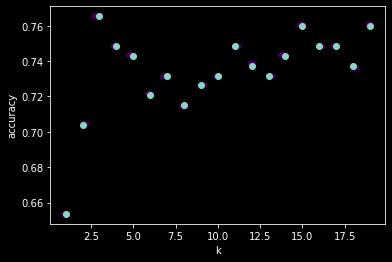

In [291]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.style.use('dark_background')
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.hexbin(k_range,scores, mincnt=1, gridsize=40)
plt.scatter(k_range, scores)
plt.show()

### Logistic Regression

1. Create a model that includes age in addition to fare and pclass. Does this model perform better than your baseline?



In [292]:
baseline = y_train.mode()
matches_baseline_pred = y_train == 0

baseline_accuracy = matches_baseline_pred.mean()
print(f"Our Baseline Accurary is {baseline_accuracy}")

Our Baseline Accurary is 0.6161048689138576


In [293]:
df = acquire.get_titanic_data()

In [294]:
df = prepare.prep_titanic_age(df)

In [295]:
df.head()

,survived,pclass,age,fare,alone,family,sex_male,embark_town_Queenstown,embark_town_Southampton
passenger_id,,,,,,,,,
0,0,3,22.0,7.2500,0,1,1,0,1
1,1,1,38.0,71.2833,0,1,0,0,0
2,1,3,26.0,7.9250,1,0,0,0,1
3,1,1,35.0,53.1000,0,1,0,0,1
4,0,3,35.0,8.0500,1,0,1,0,1


In [296]:
df.age.mean()

29.758888888888887

In [297]:
df.age.fillna(round(df.age.mean()), inplace=True)
# rounded since all ages are xx.0

In [298]:
df[df.index == 888]
# Checking one of the NaN age entries to make sure it went through.
# Now we should be good to split! EXCEPT, Looking at the question 
# and following questions, it looks like it wants us to only have Age, Fare, 
# and PClass, so let's clean our data some more.

,survived,pclass,age,fare,alone,family,sex_male,embark_town_Queenstown,embark_town_Southampton
passenger_id,,,,,,,,,
888,0,3,30.0,23.45,0,3,0,0,1


In [299]:
df1 = df.drop(columns={"alone", "family", "sex_male", "embark_town_Queenstown", "embark_town_Southampton"})

In [300]:
train, validate, test = prepare.data_split(df1, 'survived')
X_train = X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [301]:
X_train.head(1), y_train.head(1)
# Checking I only have the data that I want.

(              pclass   age    fare
 passenger_id                      
 455                3  29.0  7.8958,
 passenger_id
 455    1
 Name: survived, dtype: int64)

In [302]:
logit = LogisticRegression(C=1, random_state=123, class_weight="balanced", intercept_scaling=1, solver='lbfgs')

In [303]:
logit.fit(X_train, y_train)

LogisticRegression(C=1, class_weight='balanced', random_state=123)

In [304]:
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[-0.91848348 -0.02903258  0.00251423]]
Intercept: 
 [2.8649825]


In [305]:
y_pred = logit.predict(X_train)
y_pred_proba = logit.predict_proba(X_train)

In [306]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.66


In [307]:
pd.crosstab(y_train, y_pred)

col_0,0,1
survived,,
0,226,103
1,78,127


In [308]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.69      0.71       329
           1       0.55      0.62      0.58       205

    accuracy                           0.66       534
   macro avg       0.65      0.65      0.65       534
weighted avg       0.67      0.66      0.66       534



In [309]:
TP = 166
TN = 260
FP = 69
FN = 39

print(f'accuracy: {met.accuracy_score(train.survived, logit.predict(X_train)):.2%}')
print(f'true positive rate / recall: {met.recall_score(train.survived, logit.predict(X_train)):.2%}')
print(f'true negative rate / Specificity: {(TN)/(FP+TN):.2%}')
print(f'false potivie rate / Percision: {met.precision_score(train.survived, logit.predict(X_train)):.2%}')
print(f'false negative rate: {(TN)/(TN+FN):.2%}')
print(f'f1-score: {met.f1_score(train.survived, logit.predict(X_train)):.2%}')
print(f'support: {logit.predict(X_train).sum()}')

accuracy: 66.10%
true positive rate / recall: 61.95%
true negative rate / Specificity: 79.03%
false potivie rate / Percision: 55.22%
false negative rate: 86.96%
f1-score: 58.39%
support: 230


2. Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.



In [310]:
df2 = df.drop(columns={"alone","family", "embark_town_Queenstown", "embark_town_Southampton"})
df2.head()

,survived,pclass,age,fare,sex_male
passenger_id,,,,,
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1


In [311]:
train, validate, test = prepare.data_split(df2, 'survived')
X_train = X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [312]:
logit = LogisticRegression(C=1, random_state=123, intercept_scaling=1, solver='lbfgs') # Adding class_weight='balanced' here turns this model into a mirror of the above one.
logit.fit(X_train, y_train)

LogisticRegression(C=1, random_state=123)

In [313]:
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)
y_pred = logit.predict(X_train)
y_pred_proba = logit.predict_proba(X_train)

Coefficient: 
 [[-1.14876939e+00 -2.80099715e-02 -1.07172112e-03 -2.59972993e+00]]
Intercept: 
 [4.58448427]


In [314]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.81


In [315]:
pd.crosstab(y_train, y_pred)

col_0,0,1
survived,,
0,283,46
1,57,148


In [316]:
print(classification_report(y_train, y_pred))
TP = 148
TN = 283
FP = 46
FN = 57

print(f'accuracy: {met.accuracy_score(train.survived, logit.predict(X_train)):.2%}')
print(f'true positive rate / recall: {met.recall_score(train.survived, logit.predict(X_train)):.2%}')
print(f'true negative rate / Specificity: {(TN)/(FP+TN):.2%}')
print(f'false potivie rate / Percision: {met.precision_score(train.survived, logit.predict(X_train)):.2%}')
print(f'false negative rate: {(TN)/(TN+FN):.2%}')
print(f'f1-score: {met.f1_score(train.survived, logit.predict(X_train)):.2%}')
print(f'support: {logit.predict(X_train).sum()}')

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       329
           1       0.76      0.72      0.74       205

    accuracy                           0.81       534
   macro avg       0.80      0.79      0.79       534
weighted avg       0.81      0.81      0.81       534

accuracy: 80.71%
true positive rate / recall: 72.20%
true negative rate / Specificity: 86.02%
false potivie rate / Percision: 76.29%
false negative rate: 83.24%
f1-score: 74.19%
support: 194


3. Try out other combinations of features and models.



In [317]:
df3 = df.drop(columns={"alone", "embark_town_Queenstown", "embark_town_Southampton"}) # Keeping 'family' for this one, it counts how many family memebers the person had, if they're alone it is 0.
df3.head()

,survived,pclass,age,fare,family,sex_male
passenger_id,,,,,,
0,0,3,22.0,7.2500,1,1
1,1,1,38.0,71.2833,1,0
2,1,3,26.0,7.9250,0,0
3,1,1,35.0,53.1000,1,0
4,0,3,35.0,8.0500,0,1


4. Use you best 3 models to predict and evaluate on your validate sample.



5. Choose you best model from the validation performation, and evaluate it on the test dataset. How do the performance metrics compare to validate? to train?

Bonus1: How do different strategies for handling the missing values in the age column affect model performance?

Bonus2: How do different strategies for encoding sex affect model performance?

Bonus3: scikit-learn's LogisticRegression classifier is actually applying a regularization penalty to the coefficients by default. This penalty causes the magnitude of the coefficients in the resulting model to be smaller than they otherwise would be. This value can be modified with the C hyper parameter. Small values of C correspond to a larger penalty, and large values of C correspond to a smaller penalty.

Try out the following values for C and note how the coefficients and the model's performance on both the dataset it was trained on and on the validate split are affected.
C = .01, .1, 1, 10, 100, 1000


Bonus Bonus: how does scaling the data interact with your choice of C?